# Royal Rumble Data Analysis

The WWE presents a product that is scripted entertainment in the veil of a legitimate sport. There are countless movies and tv shows that have depicted rare or impossible sporting events and outcomes, but professional wrestling as an art form relies on the suspension of the audience's disbelief- not merely for an hour or so, but in a sustained fashion over repeated viewings. Even though nearly every wrestling fan is aware of the fact that the product is scripted, they want it to be compelling theater. If a storyline is too predictable and/or doesn't align with what the audience desires as far as outcomes go, the outcry ranges from minor to near-revolt.

The Royal Rumble is an annual event that features a match by the same name, in which two wrestlers begin in the ring and another joins them every 1.5-2 minutes until 30 wrestlers have entered the ring. The only way to be eliminated from the match is by being thrown over the top rope and having both feet touch the ground (a quite literal rule that has been taken advantage of on many occasions), and the winner is the final wrestler left in the ring. It is one of the WWE's biggest attractions of the year, and the winner of the event is guaranteed to appear in the title match at WrestleMania (i.e., there are huge implications both in and out of the storyline itself).

Ultimately, the goal of this project is to answer a data science question, of course, but also an ontological question- namely, does the scripting of the WWE Royal Rumble occur in such a fashion that we can coherently predict the winners and/or generate a win-probability model *as though it were a real sporting event.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
## This csv file was generated using the scripts available in the repository

RUMBLE_DATA = pd.read_csv('Rumble_Data_Cleaned_Final.csv')

Using parametric estimation and other statistical and machine learning techniques to model deterministic phenomena is not unprecendented- in fact, it's quite the opposite. We constantly estimate fixed parameters because even though they're deterministic, the bread crumbs that lead to them are scattered randomly in varying quantities with varying precision. Additionally, deterministic choices by the scripters of the WWE, when viewed through the guise of wrestling's veneer, can instead appear as performance metrics and indicators of success no different than those of a regular sporting event. We know ex ante that star wrestlers in the vein of Hulk Hogan and John Cena will be given ample time on-screen and eliminate several wrestlers- but statistical models have no way of parsing the difference between 'John Cena had 5 eliminations because it was scripted' and 'John Cena had 5 eliminations because he is a multiple-time world champion wrestler with exceptional skill in a fake domain.' The best motivating example of this is given in the plot below- for the 30 Royal Rumbles of uniform length (1988, 2011 and the 2018 'Greatest Royal Rumble' event are excluded), each point represents an individual wrestler in an individual year, with number of eliminations on the x-axis and time spent in the match on the y-axis.

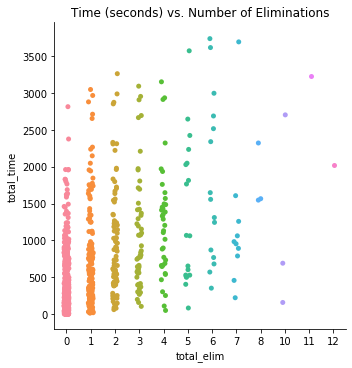

In [4]:
sns.catplot(x = 'total_elim', y = 'total_time', data = RUMBLE_DATA)

plt.title('Time (seconds) vs. Number of Eliminations')

plt.show()

The density of points in the range from 0-2 is extremely high, with less representation as total eliminations increases. But we observe *_almost no correlative relationship_* between number of eliminations and time spent in the ring. We can view this as good evidence that wrestling is scripted, as we would probably expect eliminations to increase the longer one spends in the match due to sheer opportunity alone. However, we can also interpret this as evidence that 'wrestling-as-real' shares common ground with the most popular sports in the world- it has both *offensive* and *defensive* components 

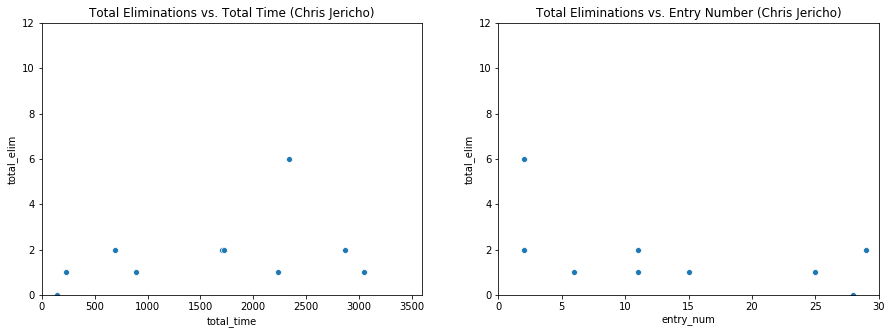

In [5]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.scatterplot(x = 'total_time', y = 'total_elim',
                data = RUMBLE_DATA[RUMBLE_DATA['name'] == 'Chris Jericho'])

plt.ylim(0,12)
plt.xlim(0,3600)
plt.title ('Total Eliminations vs. Total Time (Chris Jericho)')

plt.subplot(1,2,2)
sns.scatterplot(x = 'entry_num', y = 'total_elim',
                data = RUMBLE_DATA[RUMBLE_DATA['name'] == 'Chris Jericho'])

plt.ylim(0,12)
plt.xlim(0,30)
plt.title ('Total Eliminations vs. Entry Number (Chris Jericho)')

plt.show()

A common talking point on WWE television is how big of a disadvantage it is to enter into the match early. This is logical- it's much more difficult to outlast 29 people and battle for nearly an hour than it is to outlast a handful of people and only have to fight for 10 minutes. The plots above show that irrespective of what number he enters or how long he lasts in the match, Chris Jericho tends to have either 1 or 2 eliminations. We're confined to a small sample to analyze in general, but Chris Jericho has the ability to last a long time in the match- he is a lighter wrestler, a veteran of many years who honed his craft over the world. In the parlance we've developed, he is an excellent defensive wrestler, having lasted over 30 minutes on multiple occassions- observe the violin plot below.

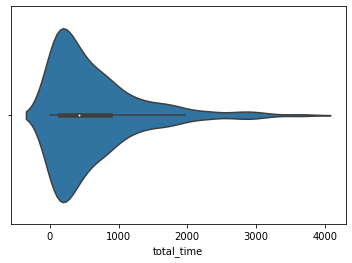

In [6]:
sns.violinplot(RUMBLE_DATA['total_time'])

If we examine the inner boxplot, all of the aforementioned performances are outliers in the total time distribution, amd have very little probability mass according to the kernel density. On the other hand, there are also wrestlers who tend to produce many eliminations while not lasting very long in the match. Below are the same plots for the Big Show.

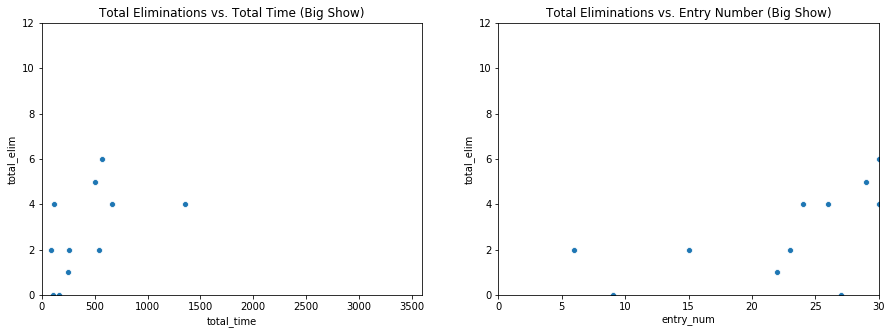

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x = 'total_time', y = 'total_elim',
                data = RUMBLE_DATA[RUMBLE_DATA['name'] == 'Big Show'])

plt.ylim(0,12)
plt.xlim(0,3600)
plt.title ('Total Eliminations vs. Total Time (Big Show)')

plt.subplot(1,2,2)
sns.scatterplot(x = 'entry_num', y = 'total_elim',
                data = RUMBLE_DATA[RUMBLE_DATA['name'] == 'Big Show'])

plt.ylim(0,12)
plt.xlim(0,30)
plt.title ('Total Eliminations vs. Entry Number (Big Show)')

plt.show()

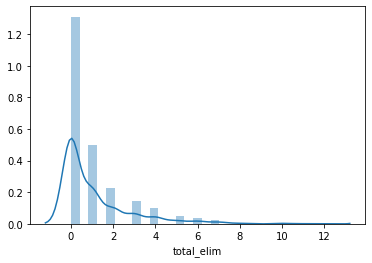

In [8]:
sns.distplot(RUMBLE_DATA['total_elim'])

Unlike the agile Chris Jericho, the Big Show is presented as a behemoth- a man who stands over 7 feet tall and weights 500 pounds. It does not require a great suspension of disbelief to reason that a smaller but skilled and agile wrestler with more stamina could outmaneuver many opponents to stay in the match for longer, while the enormously powerful contestant causes havoc before succumbing to cardiovascular limitations. Herein lies some of the divergence between reality and script. The Big Show's distribution over entry number is *clearly* not the discrete uniform distribution over the set {1,2,...,30} as the Royal Rumble purports it to be, because he serves an important role as a *plot device for a scripted television show.* He frequently enters the match late, and has been the runner up multiple times while a smaller wrestler "beats the odds" to eliminate him. A seasoned fan *knows* that the Big Show is not going to win the Royal Rumble, as the winner is catapulted into a focal point of Wrestlemania with a lengthy title match, which is not the manner in which Big Show is typically utilized. His entry and exits are listed below:

In [9]:
RUMBLE_DATA[['year', 'entry_num','exit_num']].loc[RUMBLE_DATA['name'] == 'Big Show']

,year,entry_num,exit_num
355,2000,26,29
382,2001,23,17
416,2002,27,23
473,2004,24,29
515,2006,6,7
629,2009,30,25
651,2010,22,22
689,2012,30,27
778,2015,29,28
794,2016,15,10


We do observe a downward trend in recent years (again, we are working in a (fictional) small sample space), but in general the Big Show is presented as a legitimate threat to win, with four finishes in the final four. Herein lies the fundamental schism underlying this analysis: a cogent win probability model should allocate some predictive capacity for him to win despite our ex ante knowledge that he won't.

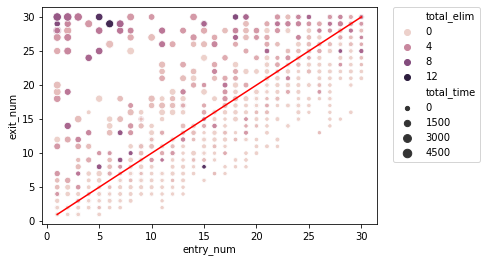

In [10]:
sns.scatterplot(x = 'entry_num', y = 'exit_num', size = 'total_time', hue = 'total_elim',  data = RUMBLE_DATA)

x_plot = np.linspace(1,30)
y_plot = x_plot
plt.plot(x_plot, y_plot, color = 'r')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


Here we observe the general trend of the Royal Rumble. There is an extremely strong correlative relationship between the number in which you enter and the number at which you exit. The red line is simple y = x. Finishing below the line is not uncommon, but also indicates spending little time in the match and typically having fewer eliminations than those above the line. However, we also observe some mass in the upper left quadrant of this picture. Therein lie the truly elite competitors- a higher density of eliminations and lengthy stays in the match. This also shows that, at least across these dimensions, a simple linear model won't be sufficient as predicting which of the early entrants will have a stellar performance is critical to the success of the model. Additionally, we should seek to identify what features are driving not just high placement, but outright wins.

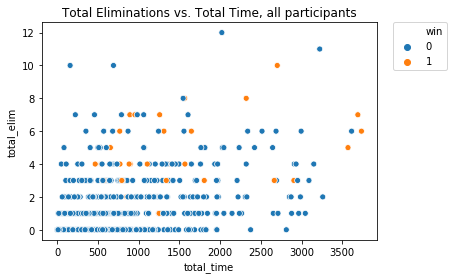

In [11]:
sns.scatterplot(x = 'total_time', y = 'total_elim', hue = 'win', data = RUMBLE_DATA)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Eliminations vs. Total Time, all participants')
plt.show()

Aside from Vince McMahon's victory in 1999 (he is a non-wrestling character who was inserted into the match and barely participated), we observe that winners typically have 3-7 eliminations, and while some spend nearly an hour in the match they generally spend 10-25 minutes competing.

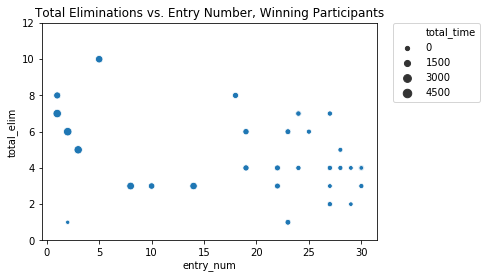

In [12]:
sns.scatterplot(x = 'entry_num', y = 'total_elim', size = 'total_time', data = RUMBLE_DATA.loc[RUMBLE_DATA['win'] ==1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Eliminations vs. Entry Number, Winning Participants')
plt.ylim(0,12)
plt.show()

Again, we observe a weak negative relationship between the number of eliminations and the temporal aspects of the match. Of the 30 years accounted for by this data, 9 of the victors entered at 15 or below, with the remaining 22 entering at 16 or higher. Entering later is clearly beneficial, but doesn't tell the whole story. We've also established, at least anecdotally, that there are both offensive and defensive aspects to the match. The images above are spread out a bit, so if we normalize the feature space we can get a picture using clusters.

In [172]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

km = KMeans(n_clusters = 4, init = 'random', n_init = 10, random_state = 0)

X = RUMBLE_DATA[['total_time','total_elim']]

min_max = preprocessing.MinMaxScaler()

x_scaled = min_max.fit_transform(X)

X = pd.DataFrame(x_scaled)

y_km = km.fit_predict(X)

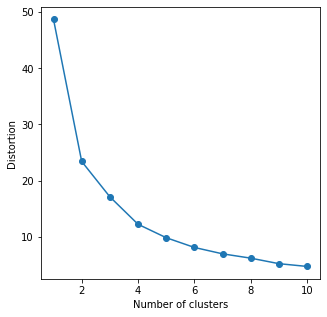

In [129]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The elbow plot tells us that four is the ideal number of clusters, which makes perfect sense- there are those who are skilled at staying in the match, there are those who are skilled at eliminating people, those who are neither, and those who are both.

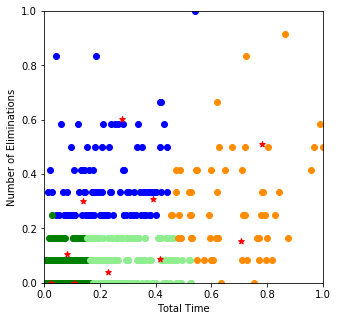

In [130]:
ax1 = plt.scatter(X[y_km == 0].iloc[:,0], X[y_km == 0].iloc[:,1] , c = 'blue')

ax2 = plt.scatter(X[y_km == 1].iloc[:,0], X[y_km == 1].iloc[:,1], c = 'green')

ax3 = plt.scatter(X[y_km == 2].iloc[:,0], X[y_km == 2].iloc[:,1], c = 'lightgreen')

ax4 = plt.scatter(X[y_km == 3].iloc[:,0], X[y_km == 3].iloc[:,1], c = 'darkorange')

ax5 = plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'red', marker = '*')

plt.rcParams['figure.figsize'] = [5, 5]
plt.xlabel('Total Time')
plt.ylabel('Number of Eliminations')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

The strong mass in green relative to blue indicates that medium stays in the match are easier to come by than multiple eliminations. This is also sensible given the discreteness of eliminations, as there are only 29 to divvy up among the 30 entrants, and the possible number of eliminations for any entrant is capped by how many have occurred prior to their entry. Indeed, when looking for winners, we expect some from the blue group- those who enter late and clean house, and some from the orange group- those who can fend for themselves while also eliminating enough wrestlers to end up on top. As we set out to model the match results, especially using historical data, it is important to have representation across the entire sample space. The density of repeat entrants soars through the upper two thirds of the data set, so the train-test split needs to ensure enough representation across the sample space to make good predictions throughout.

In [16]:
import random

random.seed(0)

cluster_1 = [1989,1990,1991,1992,1993]
cluster_2 = [1994,1995,1996,1997,1998]
cluster_3 = [1999,2000,2001,2002,2003]
cluster_4 = [2004,2005,2006,2007,2008]
cluster_5 = [2009,2010,2012,2013,2014]
cluster_6 = [2015,2016,2017,2018,2019]

test_years = []

test_years.append(random.sample(cluster_1, 1))
test_years.append(random.sample(cluster_2, 1))
test_years.append(random.sample(cluster_3, 1))
test_years.append(random.sample(cluster_4, 1))
test_years.append(random.sample(cluster_5, 1))
test_years.append(random.sample(cluster_6, 1))

print(test_years)

[[1992], [1997], [1999], [2006], [2014], [2018]]


In [17]:
cluster_1_mask = ((RUMBLE_DATA['year'] == 1989) |
                  (RUMBLE_DATA['year'] == 1990) |
                  (RUMBLE_DATA['year'] == 1991) |
                  (RUMBLE_DATA['year'] == 1993))

cluster_2_mask = ((RUMBLE_DATA['year'] == 1994) |
                  (RUMBLE_DATA['year'] == 1995) |
                  (RUMBLE_DATA['year'] == 1996) |
                  (RUMBLE_DATA['year'] == 1998))

cluster_3_mask = ((RUMBLE_DATA['year'] == 2000) |
                  (RUMBLE_DATA['year'] == 2001) |
                  (RUMBLE_DATA['year'] == 2002) |
                  (RUMBLE_DATA['year'] == 2003))

cluster_4_mask = ((RUMBLE_DATA['year'] == 2004) |
                  (RUMBLE_DATA['year'] == 2005) |
                  (RUMBLE_DATA['year'] == 2007) |
                  (RUMBLE_DATA['year'] == 2008))

cluster_5_mask = ((RUMBLE_DATA['year'] == 2009) |
                  (RUMBLE_DATA['year'] == 2011) |
                  (RUMBLE_DATA['year'] == 2012) |
                  (RUMBLE_DATA['year'] == 2013))

cluster_6_mask = ((RUMBLE_DATA['year'] == 2015) |
                  (RUMBLE_DATA['year'] == 2016) |
                  (RUMBLE_DATA['year'] == 2017) |
                  (RUMBLE_DATA['year'] == 2019))

rumble_train = RUMBLE_DATA.loc[cluster_1_mask | cluster_2_mask | cluster_3_mask |
                                    cluster_4_mask | cluster_5_mask | cluster_6_mask]

In [18]:
test_mask = ((RUMBLE_DATA['year'] == 1992) |
                  (RUMBLE_DATA['year'] == 1997) |
                  (RUMBLE_DATA['year'] == 1999) |
                  (RUMBLE_DATA['year'] == 2006) |
                  (RUMBLE_DATA['year'] == 2014) |
                  (RUMBLE_DATA['year'] == 2018)
                )

rumble_test = RUMBLE_DATA.loc[test_mask]

We don't have the luxury of a large data set- with only 30 matches and without uniform participation across all years, we have a dearth of results relative to even one NBA or MLB season. The typical baseline win model of logistic regression is an extremely poor fit for this model. In any given year there is precisely one winner (except for the simultaneous elimination in 1993- the corner case rate is truly amazing). A ratio of 29 zeroes to only one 1 will produce excellent specificity but horrific sensitivity, and predicting the one winner in any year will be almost impossible. An ordinal logistic regression model with 30 outcomes has far too little data to train on, and is asking far too much in general of the data. We can at least start by exploring the most basic implementation of a regression model, with the exit number as the depenent variable. This is a good working proxy- the most likely winner according to the model would be the one with the highest predicted exit number. The chosen variables came from many iterations of looking at the R^2 on the test data, as well as the plots and predictions. They are:

- Previous Royal Rumble wins
- Entry Number in the Royal Rumble match
- Average cumulative time over all previous participations in the Royal Rumble match
- Average cumulative eliminations over all previous participations in the Royal Rumble match
- Number of reigns as world champion
- Number of reigns as Intercontinental champion
- Total break taken during the match (time spent out of the ring illegally and/or due to injury)
- The amount of time spent in the ring with a tag team partner or a member of the same faction, if any

In [30]:
from sklearn.linear_model import LinearRegression

lnrmdl = LinearRegression()

features = ['prev_win','entry_num','avg_cum_time', 'prev_app',
                     'avg_cum_elim', 'world_reigns', 'ic_reigns',
                       'total_break', 'tag_overlap']

y_train = rumble_train['exit_num']

X_train = rumble_train[features]

X_test = rumble_test[features]
                     
y_test = rumble_test['exit_num']

lnrmdl.fit(X_train,y_train)

linreg_pred = lnrmdl.predict(X_test)

print(lnrmdl.score(X_test,y_test))
print(list(zip(lnrmdl.coef_, features)))

0.542484573881109
[(0.712741304777714, 'entry_num'), (0.0011312607222293328, 'avg_cum_time'), (-0.33656314472422777, 'prev_app'), (0.7018721160482858, 'avg_cum_elim'), (0.2627278539705324, 'world_reigns'), (0.9892968605728691, 'ic_reigns'), (0.00821006208315098, 'total_break'), (0.005884269238781393, 'tag_overlap')]


As always, the beauty of the linear regression model is that we have clean interpretations of all the coefficients- , an additional bump of 1 in expected exit number for every reign as Intercontinental champion, an additional increase of .7 in exit number for every unit increase in entry number, and so on. The traditional OLS model compared favorably to LASSO, ridge, and elastic net models- none of which could solve a fundamental problem with the OLS estimates: the linear model is ill-posed for some of the most important observations. In 1992, Ric Flair had no previous Royal Rumble experience, but was a decades-long veteran of professional wrestling with multiple title reigns. Similarly, in 2018, the #2 entrant was a world champion who entered his first Royal Rumble and he lasted until the final four, while the eventual winner was the #14 entrant, yet another wrestler in this vein who was making his Royal Rumble debut. 

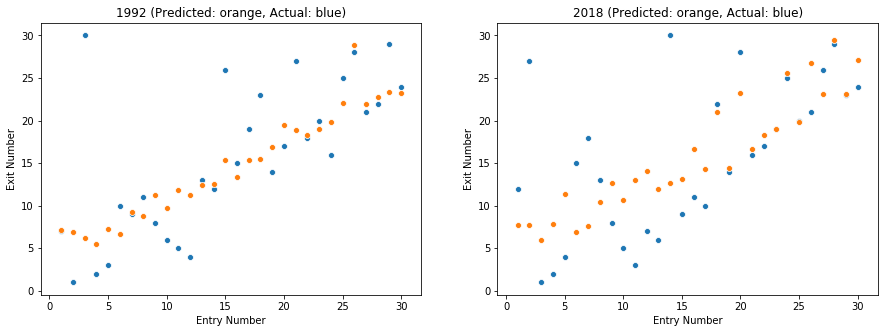

In [20]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)

sns.scatterplot(x = range(1,31), y = y_test[0:30])

sns.scatterplot(x = range(1,31), y = linreg_pred[0:30])

plt.title('1992 (Predicted: orange, Actual: blue)')

plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.subplot(1,2,2)

sns.scatterplot(x = range(1,31), y = y_test[150:180])

sns.scatterplot(x = range(1,31), y = linreg_pred[150:180])

plt.title('2018 (Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.show()

Our ideal model would be able to fit the local pockets of extremely linear data, while also being 'smart' enough to detect anomalies. Gradient boosting is a potential fit for this situation. With hyperparameter optimization and/or cross-validation, we can train the weak learners to detect the nonlinear trends that are vital to predicting how the match will unfold. We can start with the out of the box model, compare it with the linear regression predictions, and go from there.

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

features = ['prev_win','entry_num','avg_cum_time', 'prev_app',
                     'avg_cum_elim', 'world_reigns', 'ic_reigns',
                       'total_break', 'tag_overlap']

y_train = rumble_train['exit_num']

X_train = rumble_train[features]

X_test = rumble_test[features]

y_test = rumble_test['exit_num']

gbreg = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2)

gbreg.fit(X_train,y_train)

print(gbreg.score(X_test,y_test))
print(list(zip(gbreg.feature_importances_, features)))

0.5521402086057274
[(0.0035503361868394912, 'prev_win'), (0.6864131359489468, 'entry_num'), (0.07282730123014733, 'avg_cum_time'), (0.020042490089594352, 'prev_app'), (0.03399994947577596, 'avg_cum_elim'), (0.022957504250076158, 'world_reigns'), (0.045441103910788115, 'ic_reigns'), (0.05410016294141406, 'total_break'), (0.06066801596641776, 'tag_overlap')]


In [100]:
from sklearn.ensemble import GradientBoostingRegressor

features = ['prev_win','entry_num','avg_cum_time', 'prev_app',
                     'avg_cum_elim', 'world_reigns', 'ic_reigns',
                       'total_break', 'tag_overlap']

y_train = rumble_train['exit_num']

X_train = rumble_train[features]

X_test = rumble_test[features]

y_test = rumble_test['exit_num']

gbreg = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2, n_estimators = 92, learning_rate =.1)

gbreg.fit(X_train,y_train)

print(gbreg.score(X_test,y_test))
print(list(zip(gbreg.feature_importances_, features)))

0.554858740127669
[(0.0034926166361481043, 'prev_win'), (0.6904979413168656, 'entry_num'), (0.07081068002627751, 'avg_cum_time'), (0.019367963109514885, 'prev_app'), (0.0335033885696147, 'avg_cum_elim'), (0.02276352836488422, 'world_reigns'), (0.04476920476699954, 'ic_reigns'), (0.05420853120107396, 'total_break'), (0.060586146008621444, 'tag_overlap')]


We obtain a similar coefficient of determination, while also observing how tremendous an impact that entry number has on predicting exit number. The gradient boost regressor without *any* hyperparameter tuning sacrifices a some accuracy in the highly linear regions, but is excellent at identifying an important trend: that at least one of the early participants will progress very deep into the match. However, we do have to be observant about potential overfitting- the gradient boost drastically overestimates the exit number of the #1 entrant in 2018, which may cause some initial alarm- however, the wrestler in question had finishes of 29th and 20th in only four prior observations, so we need to be diligent to not conflate overfitting with fluctuations due to the small samples. That is supported by the underfitting in the same region in 2006.

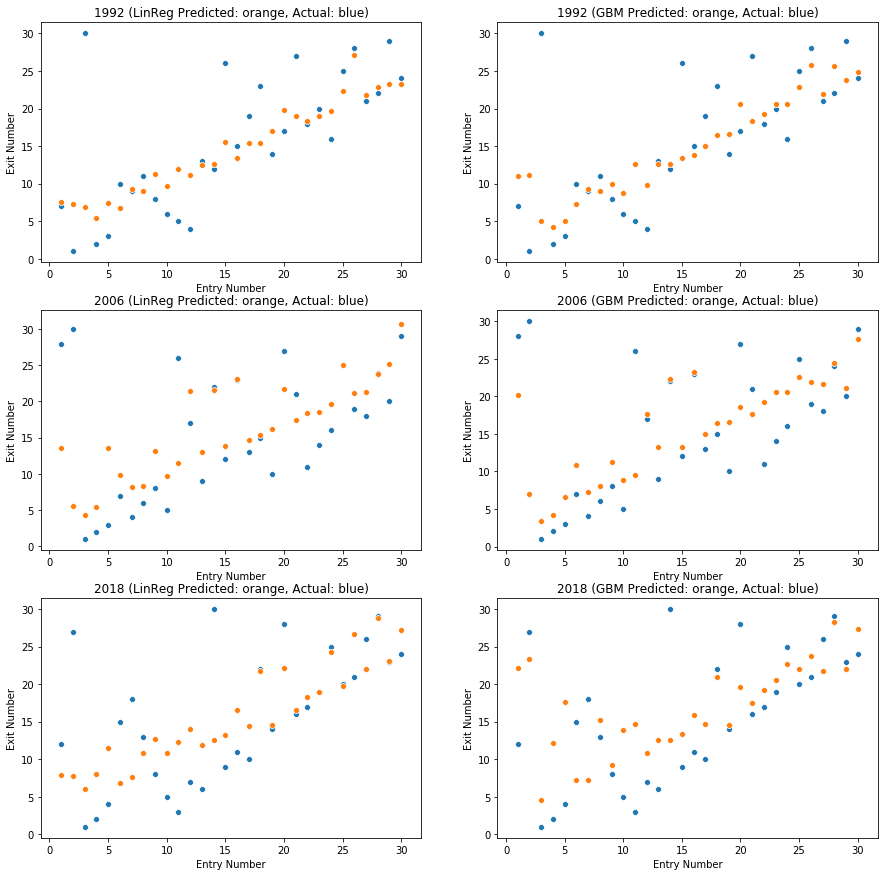

In [82]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)

sns.scatterplot(x = range(1,31), y = y_test[0:30])

sns.scatterplot(x = range(1,31), y = linreg_pred[0:30])

plt.title('1992 (LinReg Predicted: orange, Actual: blue)')

plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.subplot(3,2,2)

sns.scatterplot(x = range(1,31), y = y_test[0:30])

sns.scatterplot(x = range(1,31), y = gb_pred[0:30])

plt.title('1992 (GBM Predicted: orange, Actual: blue)')

plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.subplot(3,2,3)
sns.scatterplot(x = range(1,31), y = y_test[90:120])

sns.scatterplot(x = range(1,31), y = linreg_pred[90:120])

plt.title('2006 (LinReg Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.subplot(3,2,4)
sns.scatterplot(x = range(1,31), y = y_test[90:120])

sns.scatterplot(x = range(1,31), y = gb_pred[90:120])

plt.title('2006 (GBM Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')


plt.subplot(3,2,5)
sns.scatterplot(x = range(1,31), y = y_test[150:180])

sns.scatterplot(x = range(1,31), y = linreg_pred[150:180])

plt.title('2018 (LinReg Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.subplot(3,2,6)
sns.scatterplot(x = range(1,31), y = y_test[150:180])

sns.scatterplot(x = range(1,31), y = gb_pred[150:180])

plt.title('2018 (GBM Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')


plt.show()

With some light tuning of the initialized hyperparameters, we saw some minor improvements in the score. However, we should make sure to cross-validate to assuage any fears about using an ensemble method to make predictions.

In [168]:
np.random.seed(0)

years = pd.Series(RUMBLE_DATA['year'].unique())

years = years.sample(frac=1).reset_index(drop = True)

cv_clusters = []

cv_scores = np.zeros(10)

for i in range(10):
    cv_clusters.append([years[3*i],years[3*i + 1],years[3*i + 2]])
    
for i in range(10):
    gbreg = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2, n_estimators = 92, 
                                      learning_rate =.1)
    year_0 = cv_clusters[i][0]
    year_1 = cv_clusters[i][1]
    year_2 = cv_clusters[i][2]
    cv_mask = ((RUMBLE_DATA['year'] != year_0) &
                (RUMBLE_DATA['year'] != year_1) &
                (RUMBLE_DATA['year'] != year_2))
    
    X_train = RUMBLE_DATA[features].loc[cv_mask]
    y_train = RUMBLE_DATA['exit_num'].loc[cv_mask]
    X_test = RUMBLE_DATA[features].loc[~cv_mask]
    y_test = RUMBLE_DATA['exit_num'].loc[~cv_mask]
    
    gbreg.fit(X_train,y_train)
    score = gbreg.score(X_test,y_test)
    cv_scores[i] = score
    
print([i for i in zip(cv_clusters,cv_scores)])

print(cv_scores.mean())
print(cv_scores.var())

    

[([1991, 2018, 2002], 0.5396494379734036), ([1999, 2016, 2014], 0.6959049403061313), ([2017, 2000, 2006], 0.5767126510429252), ([2012, 1994, 2005], 0.655055639285901), ([1997, 2003, 2013], 0.5219498321974099), ([2009, 1990, 2019], 0.6025124492656952), ([1995, 1993, 2007], 0.5980035351076509), ([2008, 1998, 1996], 0.5996250473153031), ([2015, 1992, 1989], 0.574477902992231), ([2010, 2004, 2001], 0.713381110181921)]
0.6077272545668573
0.0035425188457932507


In [ ]:
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2, n_estimators = 92, 
                                      learning_rate =.1)

param_test1 = {'n_estimators':range(20,121,10)}
gsearch1 = GridSearchCV(estimator = gbr,
                        param_gri)


In [176]:
RUMBLE_DATA['KM'] = pd.Series(km.labels_)

In [185]:
RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Sheamus']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year,entry_num,exit_num,name,entry_time,exit_time,total_time,...,ic_reigns,us_reigns,total_elim,win,time_prop,heel,face,prev_win,hoss,KM
681,681,741,741,2012,22,30,Sheamus,1954,3294,1340,...,0,1,3,1,1.000000,0,1,0,0,0
700,700,760,760,2013,11,28,Sheamus,914,3148,2234,...,0,1,5,0,0.934728,0,1,1,0,3
736,736,796,796,2014,17,28,Sheamus,1478,3170,1692,...,0,1,1,0,0.925602,0,1,1,0,2
808,808,868,868,2016,29,27,Sheamus,3086,3584,259,...,0,2,1,0,0.420455,1,0,1,0,1
825,825,885,885,2017,16,14,Sheamus,1671,2406,735,...,0,2,4,0,0.357664,0,1,1,0,0
850,850,910,910,2018,11,3,Sheamus,984,986,2,...,0,2,0,0,0.000680,1,0,1,0,1


In [127]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
gbcv = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2, n_estimators = 92, learning_rate =.1)
score = cross_val_score(gbcv, X_train[features], y_train, cv = 10)
print(score)
print(score.mean())
print(score.std())
print(score.var())

[0.71947173 0.6038182  0.55778887 0.63517606 0.69120304 0.49142782
 0.52067379 0.4378759  0.57522728 0.61875709]
0.5851419780898381
0.08291435309072351
0.006874789948453171


In [22]:
gb_pred = gbreg.predict(X_test)

In [23]:
RUMBLE_DATA['total_elim'].mean()

1.1011111111111112

In [24]:
RUMBLE_DATA['total_elim'].var()

3.0542813002101106

In [27]:
from scipy import stats 
import pymc3 as pm 
import re

In [28]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, var_names=varnames, figsize=(12, nrows*1.4),
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(trcs, varnames=varnames).iterrows()]))

    for i, mn in enumerate(pm.summary(trcs, varnames=varnames)['mean']):
        ax[i, 0].annotate('{:.2f}'.format(mn), xy=(mn, 0), xycoords='data',
                          xytext=(5, 10), textcoords='offset points', rotation=90,
                          va='bottom', fontsize='large', color='#AA0022')


def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log', rv.name) or re.search('_interval', rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

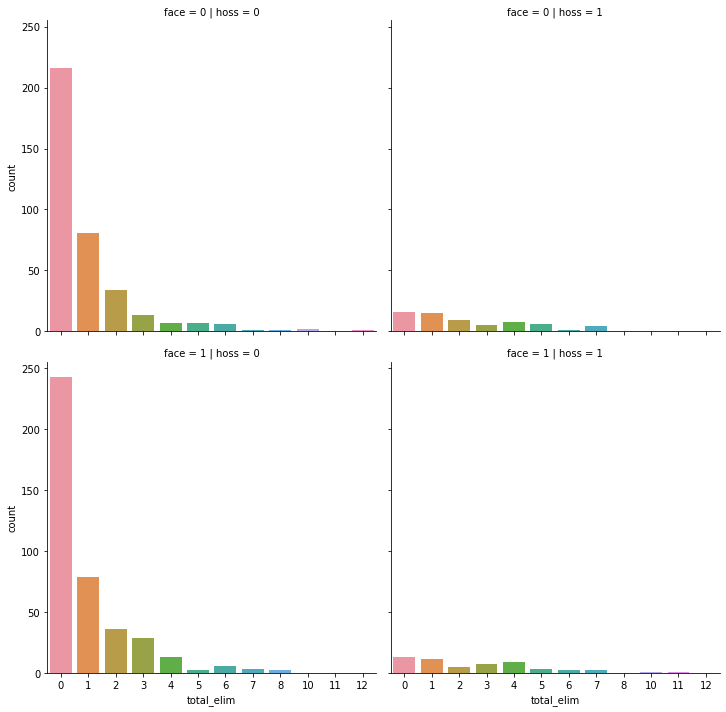

In [39]:
g = sns.catplot(x= 'total_elim', row = 'face',col = 'hoss', data = RUMBLE_DATA, kind = 'count')

In [58]:
np.exp(pm.summary(trace,varnames=varnames))[['mean','hpd_2.5','hpd_97.5']]

,mean,hpd_2.5,hpd_97.5
Intercept,3.595367e-01,0.311279,4.199128e-01
total_time,1.000883e+00,1.000764,1.001008e+00
hoss,3.032476e+00,2.468599,3.835896e+00
world_reigns,1.112191e+00,1.069514,1.155512e+00
mu,3.714609e+24,1.014187,6.468609e+43
alpha,4.455886e+00,2.910079,6.456964e+00


In [53]:
fml = 'total_elim ~ total_time + hoss + world_reigns'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=RUMBLE_DATA, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(1000,init = 'adapt_diag', tune=1000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, world_reigns, hoss, total_time, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:22<00:00, 179.48draws/s]


In [57]:
varnames = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
print(varnames)

['Intercept', 'total_time', 'hoss', 'world_reigns', 'mu', 'alpha']


In [25]:
RUMBLE_DATA.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'year', 'entry_num',
       'exit_num', 'name', 'entry_time', 'exit_time', 'total_time', 'elim_by',
       'solo_elim', 'group_elim', 'illegal_elim', 'alignment', 'tag_overlap',
       'tag_team', 'tag_partner', 'illegal_exit', 'accidental_exit',
       'cum_elim', 'avg_cum_elim', 'world_champ', 'Unnamed: 20', 'cum_time',
       'avg_cum_time', 'prev_app', 'us_champ', 'cruise_champ', 'break_begin',
       'break_end', 'total_break', 'break', 'world_reigns', 'ic_reigns',
       'us_reigns', 'total_elim', 'win', 'time_prop', 'heel', 'face',
       'prev_win', 'hoss'],
      dtype='object')

In [286]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

GS = GridSearchCV(gbreg)

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

In [288]:
features = ['prev_win','entry_num','avg_cum_time', 'prev_app',
                     'avg_cum_elim', 'world_reigns', 'ic_reigns',
                       'total_break', 'tag_overlap']

y_train = rumble_train['exit_num']

X_train = rumble_train[features]

X_test = rumble_test[features]

y_test = rumble_test['exit_num']

gbreg1 = GradientBoostingRegressor(subsample = .9, random_state = 0)

gbreg1.fit(X_train,y_train)

print(gbreg1.score(X_test,y_test))
print(list(zip(gbreg1.feature_importances_, features)))

0.5388366819769992
[(0.006159255127262194, 'prev_win'), (0.6677977000903241, 'entry_num'), (0.08052092958275008, 'avg_cum_time'), (0.01970127578144466, 'prev_app'), (0.03402289055698397, 'avg_cum_elim'), (0.023810528857148235, 'world_reigns'), (0.05222691962910934, 'ic_reigns'), (0.05777888350180435, 'total_break'), (0.05798161687317305, 'tag_overlap')]


In [ ]:
from sklearn.linear_model import LinearRegression

lnrmdl = LinearRegression()

y_train = rumble_train['exit_num']

X_train = rumble_train[['entry_num','avg_cum_time', 'prev_app',
                     'avg_cum_elim', 'world_reigns', 'ic_reigns',
                       'total_break',
                       'prev_win']]

X_test = rumble_test[['entry_num','avg_cum_time', 'prev_app',
                     'avg_cum_elim', 'world_reigns', 'ic_reigns',
                      'total_break',
                     'prev_win']]

y_test = rumble_test['exit_num']

lnrmdl.fit(X_train,y_train)

lnrmdl.score(X_test,y_test)

In [87]:
biggest_states = []
rumble_lengths = []
for year in MATCH_DATA['year'].unique():
    biggest_state = max([y for (x,y) in numbers_in_dict[year]])
    length = max([x for (x,y) in numbers_in_dict[year]])
    biggest_states.append((year,biggest_state))
    rumble_lengths.append(length)

# The Royal Rumble as a Stochastic Process

One of my initial ideas for the project was to employ a Hidden Markov model. The 'hidden states' aspect of the model is a good fit for the process in the abstract, as we streams of output over different time intervals throughout the match but don't observe the direct proceses that dictate those results. Another benefit of this model is that we know ex ante that this is a mixture model- the entrances and exits are borne of different distributions entirely, and we can also reasonably infer that the distributions are not independent, which is baked into the HMM from the start. If we parameterize time as discrete, we can think of the Royal Rumble as satisfying the Markov property insofar as the next state in the sequence can fork in three directions. The first is that the state stays the same, the second that someone enters the match, the third being that one or more participants exit the match. The encoding structure for a model of this sort *could* be length 30 one-hot vectors to represent 'in' and 'out', but the E-M algorithm used for Hidden Markov models needs full support for every state in both the prior transition matrix and in the random state initialization. Given how sparse some of these vectors are relative to the empirics (the sample maximum of wrestlers in the ring at any given time in any given year is only 15), the model would not be able to converge in a meaningful way. If, instead, we suppress the one-hot vectors into simply the number of wrestlers in the ring at time t, fitting a Hidden Markov model will show us general trends 

In [239]:
rumble_states = eval(open('num_in_states.txt','r').read())

for year, states in rumble_states.items():
    states[year].append((len(states), 0))


TypeError: list indices must be integers or slices, not float

In [ ]:


col = 3
row = 3 
count = 0 



In [203]:
rumble_states = eval(open('num_in_states.txt','r').read())

rumble_years = list(rumble_states.keys())



In [213]:
from hmmlearn.hmm import MultinomialHMM

In [217]:
len(rumble_states[2018])

states_18 = rumble_states[2018]

states_18.append((3930,0))

num_in_18 = np.array([y for (x,y) in states_18]).reshape(-1,1)

In [234]:
markov_rumble = MultinomialHMM(n_components = 16)

In [235]:
markov_rumble.fit(num_in_18)

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=16,
               n_iter=10, params='ste',
               random_state=RandomState(MT19937) at 0x7EFFF8139990,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [232]:
rumble_trans_prior = np.array([[1/30,28/30,1/30,0,0,0,0,0,0,0,0,0,0,0,0],
                              [1/8,3/4,1/8,0,0,0,0,0,0,0,0,0,0,0,0],
                              [1/16,1/8,7/16,1/8,0,0,0,0,0,0,0,0,0,0,0],      
                              [0,1/16,1/8,7/16,1/8,0,0,0,0,0,0,0,0,0,0],
                              [0,0,1/16,1/8,7/16,1/8,0,0,0,0,0,0,0,0,0],
                              [0,0,0,1/16,1/8,7/16,1/8,0,0,0,0,0,0,0,0],
                              [0,0,0,0,1/16,1/8,7/16,1/8,0,0,0,0,0,0,0],
                              [0,0,0,0,0,1/16,1/8,7/16,1/8,0,0,0,0,0,0],
                              [0,0,0,0,0,0,1/16,1/8,7/16,1/8,0,0,0,0,0],
                              [0,0,0,0,0,0,0,1/16,1/8,7/16,1/8,0,0,0,0],
                              [0,0,0,0,0,0,0,0,1/16,1/8,7/16,1/8,0,0,0],
                              [0,0,0,0,0,0,0,0,0,1/16,1/8,7/16,1/8,0,0],
                              [0,0,0,0,0,0,0,0,0,0,1/16,1/8,7/16,1/8,0],
                              [0,0,0,0,0,0,0,0,0,0,0,1/16,1/8,7/16,1/8],
                              [0,0,0,0,0,0,0,0,0,0,0,0,1/8,3/4,1/8]]
                             )



In [233]:
rumble_prior = np.ones(15)
rumble_prior = rumble_prior/210
rumble_prior[1] = 14/15



markov_rumble = MultinomialHMM(n_components = 15,startprob_prior = rumble_prior,
                              transmat_prior = rumble_trans_prior)
                               

markov_rumble.fit(num_in_18)

/home/christian/.local/lib/python3.6/site-packages/hmmlearn/utils.py:79: RuntimeWarning: invalid value encountered in log
  return np.log(a)


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=15,
               n_iter=10, params='ste',
               random_state=RandomState(MT19937) at 0x7EFFF8139990,
               startprob_prior=array([0.0047619 , 0.93333333, 0.0047619 , 0.0047619 , 0.0047619 ,
       0.0047619 , 0.0047619 , 0.0047619 , 0.0047619 , 0.0047619 ,
       0.0047619 , 0.0047619 , 0.0047619 , 0.0047619 , 0.0047619 ]),
               tol=0.01,
               transmat_prior=array([[...
        0.        , 0.        , 0.0625    , 0.125     , 0.4375    ,
        0.125     , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0625    , 0.125     ,
        0.4375    , 0.125     , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0625    ,
        0.125     , 0.4375    , 0.125    

In [231]:
markov_rumble.transmat_

array([[7.79337787e-02, 2.24946541e-01, 1.35161291e-03, 2.48166448e-13,
        1.10213192e-02, 3.97368362e-03, 8.63760118e-03, 5.31707194e-03,
        5.68345468e-02, 1.18186150e-02, 1.36699361e-02, 5.77914767e-01,
        1.74498875e-03, 4.83553754e-03, 3.39197292e-13],
       [2.22690544e-02, 6.47877438e-01, 2.08678836e-04, 1.99050052e-29,
        9.00523340e-04, 4.48807515e-04, 3.08498624e-03, 1.73487851e-03,
        1.39547474e-03, 1.72718038e-03, 5.83645101e-04, 3.17679931e-01,
        1.19070650e-03, 8.98695900e-04, 2.29927260e-14],
       [1.22332665e-04, 2.04522992e-04, 6.02382825e-01, 1.04376332e-02,
        5.52764265e-20, 7.14377399e-16, 4.31181997e-39, 1.66990970e-05,
        3.07101884e-30, 2.47800168e-03, 3.16354831e-22, 7.18378780e-04,
        6.65669704e-04, 3.82973660e-01, 2.76812613e-07],
       [8.92632708e-15, 7.03411749e-30, 2.83346345e-03, 9.83138777e-01,
        3.60923429e-03, 3.58673740e-04, 3.89105115e-03, 9.72530414e-10,
        1.33185685e-03, 9.40173305e-2

In [176]:
markov_rumble = MultinomialHMM(n_components = 15,startprob_prior = rumble_prior,
                               transmat_prior = rumble_trans_prior)

In [184]:
ohnine_states = np.asarray([y for x,y in numbers_in_dict[2009]])



[2 2 2 ... 2 2 1]


AttributeError: 'NoneType' object has no attribute 'value_counts'

In [314]:
reg.score(X_test,y_test)

0.9611111111111111

In [342]:
)

0.17222222222222222

In [ ]:
g = sns.catplot(x = 'total_elim', row = 'face,')

In [447]:
from sklearn.ensemble import GradientBoostingRegressor
y_train = rumble_train['exit_num']

X_train = rumble_train[['entry_num','total_time','solo_elim', 'group_elim', 
                        'illegal_exit', 'avg_cum_elim','break','world_reigns',
                       'ic_reigns','us_reigns','total_elim']]

X_test = rumble_test[['entry_num','total_time','solo_elim', 'group_elim', 
                        'illegal_exit', 'avg_cum_elim','break','world_reigns',
                       'ic_reigns','us_reigns','total_elim']]

y_test = rumble_test['exit_num']

gbreg = GradientBoostingRegressor(random_state = 0 )

gbreg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

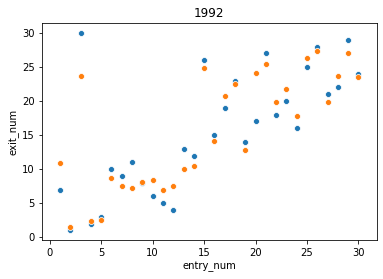

In [450]:
sns.scatterplot(x = range(1,31), y = y_test[0:30])

sns.scatterplot(x = range(1,31), y = predictions[0:30])

plt.title('1992')
plt.xlabel('entry_num')
plt.show()

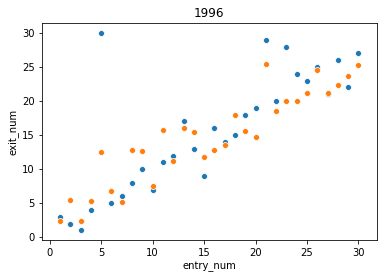

In [43]:
sns.scatterplot(x = range(1,31), y = y_test[30:60])

sns.scatterplot(x = range(1,31), y = gb2predictions[30:60])

plt.title('1996')
plt.xlabel('entry_num')
plt.show()

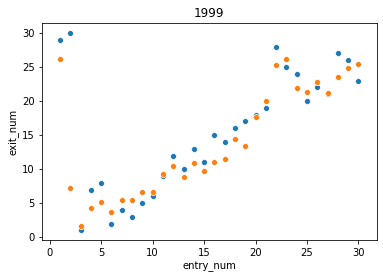

In [452]:
sns.scatterplot(x = range(1,31), y = y_test[60:90])

sns.scatterplot(x = range(1,31), y = predictions[60:90])

plt.title('1999')
plt.xlabel('entry_num')
plt.show()

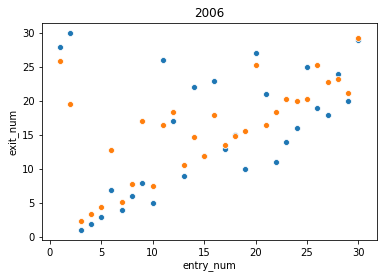

In [42]:
sns.scatterplot(x = range(1,31), y = y_test[90:120])

sns.scatterplot(x = range(1,31), y = gb2predictions[90:120])

plt.title('2006')
plt.xlabel('entry_num')
plt.show()

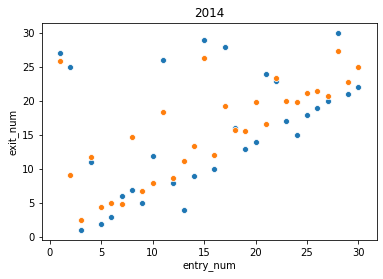

In [40]:
sns.scatterplot(x = range(1,31), y = y_test[120:150])

sns.scatterplot(x = range(1,31), y = gb2predictions[120:150])

plt.title('2014')
plt.xlabel('entry_num')
plt.show()

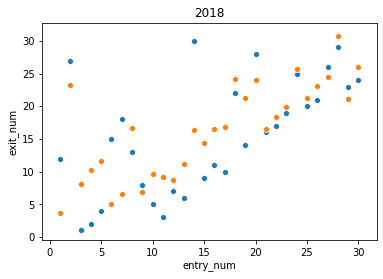

In [39]:
sns.scatterplot(x = range(1,31), y = y_test[150:180])

sns.scatterplot(x = range(1,31), y = gb2predictions[150:180])

plt.title('2018')
plt.xlabel('entry_num')
plt.show()

In [65]:
extra_data = pd.read_csv('Rumble_Data_Cleaned.csv')

In [66]:
extra_data = extra_data.loc[(extra_data['year'] != 2011) & (extra_data['year'] != 1988) & 
                            (extra_data['year'] != 2018.5)]

In [67]:
extra_data.index = clean_rumble_norm.index

In [80]:
lnrmdl.score(X_test,y_test)

0.469606423944488

In [82]:
lrpredict = lnrmdl.predict(X_test)

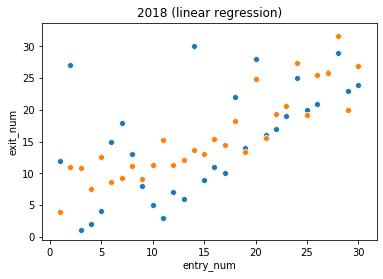

In [84]:
sns.scatterplot(x = range(1,31), y = y_test[150:180])

sns.scatterplot(x = range(1,31), y = lrpredict[150:180])

plt.title('2018 (linear regression)')
plt.xlabel('entry_num')
plt.show()

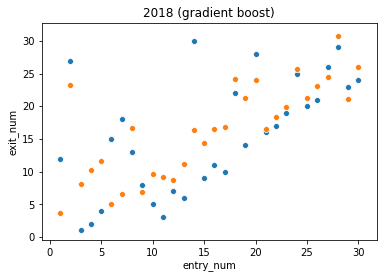

In [85]:
sns.scatterplot(x = range(1,31), y = y_test[150:180])

sns.scatterplot(x = range(1,31), y = gb2predictions[150:180])

plt.title('2018 (gradient boost)')
plt.xlabel('entry_num')
plt.show()

In [75]:
gbreg2.score(X_test,y_test)

0.673637831055552

In [8]:
gbreg2.feature_importances_

array([0.72162112, 0.10234635, 0.0426073 , 0.03310131, 0.03320788,
       0.0546756 , 0.01244045])

In [9]:
np.argsort(gbreg2.feature_importances_)

array([6, 3, 4, 2, 5, 1, 0])

In [23]:
gbreg2.score(X_test,y_test)

0.6915968188106878

In [28]:
gb2predictions = gbreg2.predict(X_test)

In [53]:
import matplotlib.pyplot as plt 


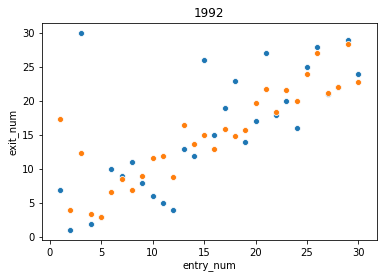

In [29]:
sns.scatterplot(x = range(1,31), y = y_test[0:30])

sns.scatterplot(x = range(1,31), y = gb2predictions[0:30])

plt.title('1992')
plt.xlabel('entry_num')
plt.show()

In [27]:
y_train = rumble_train['exit_num']

X_train = rumble_train[['entry_num','avg_cum_time','solo_elim', 'group_elim', 
                        'illegal_exit', 'avg_cum_elim','break','world_reigns',
                       'ic_reigns','us_reigns']]

X_test = rumble_test[['entry_num','avg_cum_time','solo_elim', 'group_elim', 
                        'illegal_exit', 'avg_cum_elim','break','world_reigns',
                       'ic_reigns','us_reigns']]

y_test = rumble_test['exit_num']

gbreg2 = GradientBoostingRegressor(random_state = 0)

gbreg2.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [461]:
gbreg2.feature_importances_

array([0.58911385, 0.25862468, 0.03727774, 0.0083345 , 0.00207769,
       0.01719002, 0.0102555 , 0.00265353, 0.01011354, 0.00503026,
       0.05932868])

In [546]:
for year in clean_rumble_norm['year'].unique():
    year_mask = (clean_rumble_norm['year'] == year)
        
    thirty_mask = (clean_rumble_norm['exit_num'] == 30)
    match_length = clean_rumble_norm.loc[(year_mask) & (thirty_mask), 'exit_time'].astype(int)
    clean_rumble_norm.loc[year_mask,'time_prop'] = clean_rumble_norm.loc[year_mask,'total_time']/(clean_rumble_norm.loc[year_mask,'exit_time'].max()- clean_rumble_norm.loc[year_mask,'entry_time'])

In [62]:
clean_rumble_norm['prev_win'] = 0
win_mask = clean_rumble_norm['win'] == 1

for wrestler in clean_rumble_norm['name'].unique():
    wrestler_mask = clean_rumble_norm['name'] == wrestler
    win_count = 0
    for year in clean_rumble_norm['year'].unique():
        year_mask = clean_rumble_norm['year'] == year
        prev_year_mask = clean_rumble_norm['year'] < year
        clean_rumble_norm.loc[(wrestler_mask) & (year_mask), 'prev_win'] = len(clean_rumble_norm.loc[(wrestler_mask) &
                                                                                                     (prev_year_mask) &
                                                                                                      (win_mask)])
        
    

# Predicting the order of entries into the Royal Rumble match

As established in the outset of the project, the order in which wrestlers enter the Royal Rumble match is purportedly random (in 1989 when the Million Dollar Man Ted DiBiase purchased the #30 entry from another wrestler, or in 2016 when Roman Reigns was punished by the villainous WWE brass for standing up to the establishment and forced to enter at #1 *whilst defending his WWE championship against the 29 other entrants* notwithstanding), but we know anecdotally that this isn't the case. Kofi Kingston is well-known for unconventially and fantastically avoding elimination, which has happened during a lull in the middle of the match for several consecutive years. There is *no way* that his entrances follow the discrete uniform distribution, as his kernel density plot shows below. Similarly, the Big Show, John Cena, and Batista are all practically guaranteed to enter in 20's. Other wrestlers have fairly polarized entrances, often because they can be trusted to perform well for long stretches while in their prime but as they age they no longer have that capability as in the case of Rey Mysterio and Shawn Michaels. There are nine such plots below: 

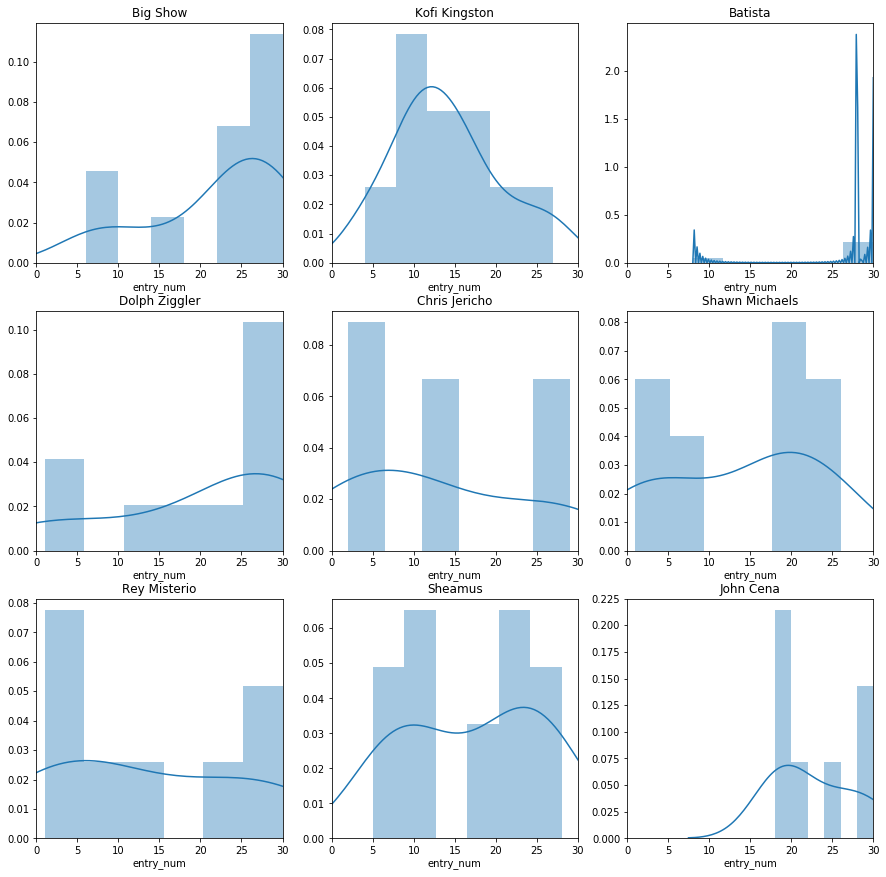

In [202]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Big Show', 'entry_num'], bins = 6)
plt.title('Big Show')
plt.xlim(0,30)

plt.subplot(3,3,2)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Kofi Kingston', 'entry_num'], bins = 6)
plt.title('Kofi Kingston')
plt.xlim(0,30)

plt.subplot(3,3,3)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Batista', 'entry_num'], bins = 6)
plt.title('Batista')
plt.xlim(0,30)

plt.subplot(3,3,4)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Dolph Ziggler', 'entry_num'], bins = 6)
plt.title('Dolph Ziggler')
plt.xlim(0,30)

plt.subplot(3,3,5)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Chris Jericho', 'entry_num'], bins = 6)
plt.title('Chris Jericho')
plt.xlim(0,30)

plt.subplot(3,3,6)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Shawn Michaels', 'entry_num'], bins = 6)
plt.title('Shawn Michaels')
plt.xlim(0,30)

plt.subplot(3,3,7)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Rey Mysterio', 'entry_num'], bins = 6)
plt.title('Rey Misterio')
plt.xlim(0,30)

plt.subplot(3,3,8)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Sheamus', 'entry_num'], bins = 6)
plt.title('Sheamus')
plt.xlim(0,30)

plt.subplot(3,3,9)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'John Cena', 'entry_num'], bins = 6)
plt.title('John Cena')
plt.xlim(0,30)


plt.show()

These are good qualitative explanations that are extremely difficult to pack into a model. Through several iterations of different GLM and ensemble methods, none of the available data formed a cogent predictive model. The next obvious place to look is through empirical Bayesian methods. There are a few major problems with trying to predict the 2020 Royal Rumble entry order by using Monte Carlo or other similar methods with the empirical posteriors. One is that the WWE is at a bit of a turning point- they are trying to create new stars as the brunt of those for which we have the best data are either in pseudo-retirement (Kane makes cameos from time to time but is the mayor of Knox County, TN, John Cena is transitioning to a career in film and TV, etc.), so the posteriors for the brunt of the participants in the 2020 Royal Rumble will be extremely nosy. We will not be able to form scaled beta or beta-binomial (depending on parameterization) posteriors from the discrete uniform distribution on {1,2,...,30} due to a lack of historical data for many of the prospective entrants. The discrete uniform distribution is completely uninformative for the scope of this problem, and it's simply asking far too much of the model to draw from an empirical distribution with just a couple observations. The direction that makes the most sense to me is to find more features outside the specific context of the Royal Rumble to further homogenize comparisons between wrestlers. How similar is Rick Martel to Dolph Ziggler? How similar is Daniel Bryan to Bret Hart? If we can cluster wrestlers, we may be able to find a reasonable sample for posteriors for a given 'type' of wrestler- with further conditional estimates to narrow the estimate from a subgroup to the most likely candidate based on available information.